<a href="https://colab.research.google.com/github/Dhanapal-Angamuthu/DeepLearning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
#tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17369839631591078802
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14619377664
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18429817203550459316
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!pip install -q keras


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#importing the dataset
dataset = pd.read_csv('/content/sample_data/ANN_Australia_Weather Training Data.csv')
dataset.head()


,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [ ]:
test_data = pd.read_csv('/content/sample_data/ANN_Australia_Weather Training Data.csv')
test_data.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
3,Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
4,Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0


In [ ]:
dataset.shape

(99516, 23)

In [ ]:
dataset.columns

Index(['row ID', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99516 entries, 0 to 99515
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row ID         99516 non-null  object 
 1   Location       99516 non-null  object 
 2   MinTemp        99073 non-null  float64
 3   MaxTemp        99286 non-null  float64
 4   Rainfall       98537 non-null  float64
 5   Evaporation    56985 non-null  float64
 6   Sunshine       52199 non-null  float64
 7   WindGustDir    92995 non-null  object 
 8   WindGustSpeed  93036 non-null  float64
 9   WindDir9am     92510 non-null  object 
 10  WindDir3pm     96868 non-null  object 
 11  WindSpeed9am   98581 non-null  float64
 12  WindSpeed3pm   97681 non-null  float64
 13  Humidity9am    98283 non-null  float64
 14  Humidity3pm    97010 non-null  float64
 15  Pressure9am    89768 non-null  float64
 16  Pressure3pm    89780 non-null  float64
 17  Cloud9am       61944 non-null  float64
 18  Cloud3

In [ ]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
count,99073.000000,99286.000000,98537.000000,56985.00000,52199.000000,93036.000000,98581.000000,97681.000000,98283.000000,97010.000000,89768.000000,89780.000000,61944.000000,59514.000000,98902.000000,97612.000000,99516.000000
mean,12.176266,23.218513,2.353024,5.46132,7.615090,39.976966,14.004849,18.650464,68.866376,51.433296,1017.684638,1015.286204,4.447985,4.519122,16.970041,21.681340,0.224677
std,6.390882,7.115072,8.487866,4.16249,3.783008,13.581524,8.902323,8.801827,19.074951,20.777616,7.110166,7.045189,2.886580,2.716618,6.488961,6.931681,0.417372
min,-8.500000,-4.100000,0.000000,0.00000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.000000,-5.100000,0.000000
25%,7.600000,17.900000,0.000000,2.60000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.80000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.40000,10.600000,48.000000,19.000000,24.000000,83.000000,65.000000,1022.400000,1020.000000,7.000000,7.000000,21.500000,26.400000,0.000000
max,33.900000,48.100000,371.000000,86.20000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000


Take care of missing values


In [ ]:
dataset.isnull().sum()

,0
row ID,0
Location,0
MinTemp,443
MaxTemp,230
Rainfall,979
Evaporation,42531
Sunshine,47317
WindGustDir,6521
WindGustSpeed,6480
WindDir9am,7006


In [ ]:
dataset.isnull().sum()/len(dataset) * 100

,0
row ID,0.000000
Location,0.000000
MinTemp,0.445155
MaxTemp,0.231119
Rainfall,0.983761
Evaporation,42.737851
Sunshine,47.547128
WindGustDir,6.552715
WindGustSpeed,6.511516
WindDir9am,7.040074


**Remove highly missing values 30% and above**

In [ ]:
col_to_drop = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']
dataset.drop(columns=col_to_drop, inplace=True)

**After removing Highly missing columns, fill the remaining cols missing values**

In [ ]:
dataset['RainTomorrow'] = dataset['RainTomorrow'].fillna(dataset['RainTomorrow'].median())
dataset['RainToday'] = dataset['RainToday'].fillna(dataset['RainToday'].mode()[0])
dataset['Temp3pm'] = dataset['Temp3pm'].fillna(dataset['Temp3pm'].median())
dataset['Temp9am'] = dataset['Temp9am'].fillna(dataset['Temp9am'].median())
dataset['Pressure3pm'] = dataset['Pressure3pm'].fillna(dataset['Pressure3pm'].median())
dataset['Pressure9am'] = dataset['Pressure9am'].fillna(dataset['Pressure9am'].median())
dataset['Humidity3pm'] = dataset['Humidity3pm'].fillna(dataset['Humidity3pm'].median())
dataset['Humidity9am'] = dataset['Humidity9am'].fillna(dataset['Humidity9am'].median())
dataset['WindSpeed3pm'] = dataset['WindSpeed3pm'].fillna(dataset['WindSpeed3pm'].median())
dataset['WindSpeed9am'] = dataset['WindSpeed9am'].fillna(dataset['WindSpeed9am'].median())
dataset['WindDir3pm'] = dataset['WindDir3pm'].fillna(dataset['WindDir3pm'].mode()[0])
dataset['WindDir9am'] = dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0])
dataset['WindGustDir'] = dataset['WindGustDir'].fillna(dataset['WindGustDir'].mode()[0])
dataset['WindGustSpeed'] = dataset['WindGustSpeed'].fillna(dataset['WindGustSpeed'].median())
dataset['Rainfall'] = dataset['Rainfall'].fillna(dataset['Rainfall'].median())
dataset['MaxTemp'] = dataset['MaxTemp'].fillna(dataset['MaxTemp'].median())
dataset['MinTemp'] = dataset['MinTemp'].fillna(dataset['MinTemp'].median())

**Now, check for the any missing items**

In [ ]:
dataset.isnull().sum()

,0
row ID,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0


**Check for duplicate values**

In [ ]:
dataset.duplicated().sum()

np.int64(0)

**Convert categorical values to numerical**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['RainToday', 'WindDir3pm', 'WindDir9am', 'WindGustDir', 'row ID', 'Location', ]
for col in categorical_columns:
   dataset[col] = le.fit_transform(dataset[col])

dataset.head()

,row ID,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12595,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
3,23294,2,14.6,29.7,0.2,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0,0
4,34220,2,7.7,26.7,0.0,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0,0


**Update the dependant variable**

In [ ]:
X = dataset.drop('RainTomorrow', axis=1)
y = dataset['RainTomorrow']

**Split the dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Doing Feature **Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train, y_train)


array([[ 0.07274808,  1.42396292,  0.2546827 , ...,  0.37440604,
         1.06506639, -0.53173339],
       [ 1.72647934, -0.54357849, -0.02734692, ..., -0.04255777,
         1.79274387, -0.53173339],
       [-1.32824516,  0.72126956, -0.07435186, ..., -0.56762331,
        -0.69591311,  1.88064173],
       ...,
       [ 0.92264846,  1.5645016 ,  0.70906377, ...,  0.99213021,
         1.03595929, -0.53173339],
       [ 1.2333651 , -1.5273492 , -0.2467033 , ..., -0.5367371 ,
        -0.08466403, -0.53173339],
       [-1.44026751,  0.22938421,  0.22334608, ..., -0.04255777,
        -0.62314537,  1.88064173]])

**Creating ANN Model using keras**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/100
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6534 - loss: 627.7484 - val_accuracy: 0.7333 - val_loss: 2.9909
Epoch 2/100
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7311 - loss: 9.5069 - val_accuracy: 0.6757 - val_loss: 3.8965
Epoch 3/100
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7373 - loss: 9.9890 - val_accuracy: 0.7986 - val_loss: 7.4077
Epoch 4/100
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7498 - loss: 8.9269 - val_accuracy: 0.5921 - val_loss: 6.1276
Epoch 5/100
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7483 - loss: 8.8790 - val_accuracy: 0.7848 - val_loss: 2.4446
Epoch 6/100
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7546 - loss: 7.6760 - val_accuracy: 0.8170 - val_loss: 2.1786
Epoch 7/100
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7417 - loss: 7.0027 - val_accuracy: 0.8334 - val_loss: 1.4818
Epoch 8/100
2488/2488 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7558 - los

**Check for the Loss and Performance**

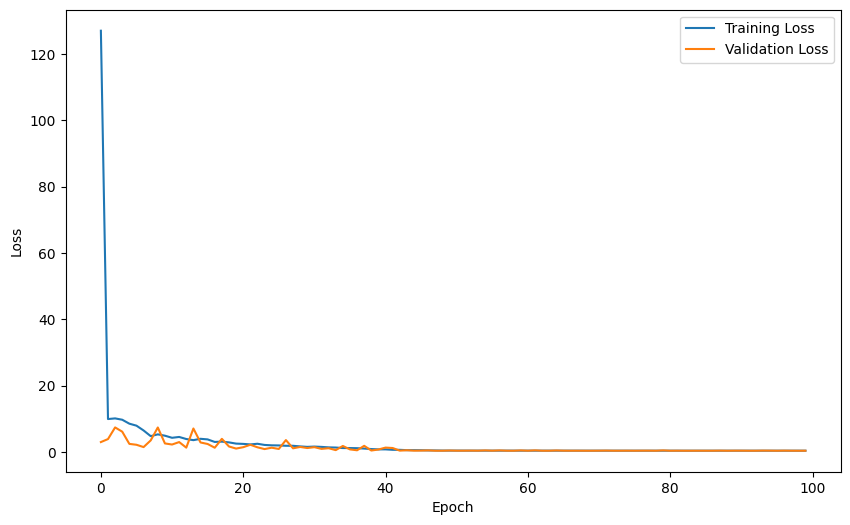

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Prediction using test data**

In [ ]:
y_pred_probs = model.predict(x_test)
y_pred = np.where((y_pred_probs > 0.5).astype(int), 1, 0)


622/622 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8375200964630225
[[14437   965]
 [ 2269  2233]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     15402
           1       0.70      0.50      0.58      4502

    accuracy                           0.84     19904
   macro avg       0.78      0.72      0.74     19904
weighted avg       0.83      0.84      0.83     19904

0.1624799035369775
